In [1]:
import pickle
from openmmtools.integrators import LangevinIntegrator
from simtk import openmm
from simtk.openmm import unit 
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
from simtk.openmm import XmlSerializer


## Get bnbs system and minimized state xmls from pickle (there's an env incompatability)

Used perses-nonstandard-aa for this part

In [4]:
# Load K27A barnase:barstar htf
with open("/data/chodera/zhangi/perses_benchmark/neq/23/0/0_complex.pickle", "rb") as f:
    htf = pickle.load(f)

In [5]:
system = htf.hybrid_system
positions = htf.hybrid_positions
box_vectors = system.getDefaultPeriodicBoxVectors()

In [6]:
# Set up integrator and context
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                                        collision_rate=1 / unit.picoseconds, 
                                                        timestep=4 * unit.femtoseconds)

platform = openmm.Platform.getPlatformByName('CUDA')
context = openmm.Context(system, integrator, platform)
context.setPositions(positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setPositions(positions)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [7]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)

In [8]:
with open('bnbs_minimized_state_0.xml', 'w') as f:
    f.write(XmlSerializer.serialize(context.getState(getPositions=True, getVelocities=True)))

with open('bnbs_system.xml', 'w') as f:
    f.write(XmlSerializer.serialize(system))


## Prep for getting energies at lambda = 0


Use perses-rest-over-protocol env for rest of the experiments

In [28]:
with open('bnbs_minimized_state_0.xml') as input:
    state = XmlSerializer.deserialize(input.read())

with open('bnbs_system.xml') as input:
    system = XmlSerializer.deserialize(input.read())
    

In [1]:
from openmmtools.integrators import LangevinIntegrator
import openmm
from openmm import unit

system = openmm.System()
system.addParticle(4 * unit.amu)
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                collision_rate=1 / unit.picoseconds, 
                                timestep=4 * unit.femtoseconds)
context = openmm.Context(system, integrator)
print(context.getSystem().getForces()) # This will not contain any forces
context.getSystem().addForce(openmm.HarmonicBondForce())
print(system.getForces()) # If the reinitialize() docs are correct, this should not return any forces


[]
[<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b63a33a8d20> >]


In [4]:
from openmmtools.integrators import LangevinIntegrator
import openmm
from openmm import unit

system = openmm.System()
system.addParticle(4 * unit.amu)
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                collision_rate=1 / unit.picoseconds, 
                                timestep=4 * unit.femtoseconds)
context = openmm.Context(system, integrator)
print(context.getSystem().getForces()) # This will not contain any forces
system.addForce(openmm.HarmonicBondForce())
print(context.getSystem().getForces()) # If the reinitialize() docs are correct, this should not return any forces


[]
[<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b63ec9c3930> >]


In [5]:
context._system.getForces()

[<openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b63ec7fe660> >]

In [30]:
# Set up integrator and context
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                collision_rate=1 / unit.picoseconds, 
                                timestep=4 * unit.femtoseconds)

platform = openmm.Platform.getPlatformByName('CUDA')
context = openmm.Context(system, integrator, platform)
# context.setPositions(positions)
# context.setPeriodicBoxVectors(*box_vectors)
# context.setPositions(positions)
# context.setVelocitiesToTemperature(300 * unit.kelvin)
context.setState(state)

In [31]:
context.getSystem().getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2acda1447330> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2acd39a71f90> >,
 <openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2acd39a75270> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2acd39a75750> >,
 <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2acd91074de0> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2acda144bbd0> >,
 <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2acda144bba0> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2acda144ba80> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of t

In [32]:
force = openmm.HarmonicBondForce()
context.getSystem().addForce(force)
# system.addForce(force)

10

In [33]:
context.getSystem().getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2acda1445c00> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2acda1445690> >,
 <openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2acda1445630> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2acda144b660> >,
 <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2acda144b7b0> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2acda144b870> >,
 <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2acda144b810> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2acda144b6f0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of t

In [34]:
system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2acda144b330> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2acda144b240> >,
 <openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2acda144b120> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2acda144b090> >,
 <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2acda144be40> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2acda144bed0> >,
 <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2acda144bf60> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2acda144c030> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of t

In [22]:
system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b642f6886c0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b642f688570> >,
 <openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b642f688d50> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b642f688660> >,
 <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2b642f688300> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b642f688d20> >,
 <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2b642f688cf0> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b642f6888d0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of t

In [23]:
system.getForce(7).getCutoffDistance()

Quantity(value=1.0, unit=nanometer)

In [24]:
system.getForce(8).getCutoffDistance()

Quantity(value=1.0, unit=nanometer)

## Get coefficient at lambda = 0 (Peter's code)

In [25]:
system.getForce(7).setUseDispersionCorrection(False)
system.getForce(8).setUseLongRangeCorrection(False)
system.getForce(7).setForceGroup(1) # so we can query just the nonbonded forces
system.getForce(8).setForceGroup(1)

e1 = context.getState(getEnergy=True, groups={1}).getPotentialEnergy()
system.getForce(7).setUseDispersionCorrection(True)
system.getForce(8).setUseLongRangeCorrection(True)

context.reinitialize(preserveState=True) # otherwise it won't see the change to the force
e2 = context.getState(getEnergy=True, groups={1}).getPotentialEnergy()
volume = context.getState().getPeriodicBoxVolume()
print('coefficient:', (e2-e1)*volume)

coefficient: 636266136.5993224 nm**3 kJ/mol


## Get energy at lambda = 0 without correction

In [7]:
system.getForce(7).setUseDispersionCorrection(False)

In [8]:
system.getForce(8).setUseLongRangeCorrection(False)

In [9]:
state = context.getState(getEnergy=True, getParameters=True)

In [10]:
state.getPotentialEnergy()

Quantity(value=-539969.1181632618, unit=kilojoule/mole)

In [11]:
state.getPeriodicBoxVolume()

Quantity(value=352.2847392743761, unit=nanometer**3)

## Get energy at lambda = 0 with correction

In [12]:
system.getForce(7).setUseDispersionCorrection(True)

In [13]:
system.getForce(8).setUseLongRangeCorrection(True)

In [14]:
state = context.getState(getEnergy=True, getParameters=True)

In [15]:
state.getPotentialEnergy()

Quantity(value=-539969.1181632618, unit=kilojoule/mole)

In [16]:
state.getPeriodicBoxVolume()

Quantity(value=352.2847392743761, unit=nanometer**3)

##  Set endstate to lambda = 1

In [26]:
with open('bnbs_minimized_state_1.xml') as input:
    state = XmlSerializer.deserialize(input.read())

with open('bnbs_system.xml') as input:
    system = XmlSerializer.deserialize(input.read())
    

In [27]:
# Set up integrator and context
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                collision_rate=1 / unit.picoseconds, 
                                timestep=4 * unit.femtoseconds)

platform = openmm.Platform.getPlatformByName('CUDA')
context = openmm.Context(system, integrator, platform)
# context.setPositions(positions)
# context.setPeriodicBoxVectors(*box_vectors)
# context.setPositions(positions)
# context.setVelocitiesToTemperature(300 * unit.kelvin)
context.setState(state)

In [28]:
for k, v in context.getParameters().items():
    if 'lambda' in k:
        context.setParameter(k, 1.0)
        
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_angles 1.0
lambda_bonds 1.0
lambda_electrostatics_core 1.0
lambda_electrostatics_delete 1.0
lambda_electrostatics_insert 1.0
lambda_sterics_core 1.0
lambda_sterics_delete 1.0
lambda_sterics_insert 1.0
lambda_torsions 1.0
softcore_alpha 0.85


In [52]:
# # Minimize
# openmm.LocalEnergyMinimizer.minimize(context)

In [53]:
# with open('bnbs_minimized_state_1.xml', 'w') as f:
#     f.write(XmlSerializer.serialize(context.getState(getPositions=True, getVelocities=True)))


## Get coefficient at lambda = 1 (Peter's code)

In [29]:
system.getForce(7).setUseDispersionCorrection(False)
system.getForce(8).setUseLongRangeCorrection(False)
system.getForce(7).setForceGroup(1) # so we can query just the nonbonded forces
system.getForce(8).setForceGroup(1)

e1 = context.getState(getEnergy=True, groups={1}).getPotentialEnergy()
system.getForce(7).setUseDispersionCorrection(True)
system.getForce(8).setUseLongRangeCorrection(True)

context.reinitialize(preserveState=True) # otherwise it won't see the change to the force
e2 = context.getState(getEnergy=True, groups={1}).getPotentialEnergy()
volume = context.getState().getPeriodicBoxVolume()
print('coefficient:', (e2-e1)*volume)

coefficient: 636138745.5262223 nm**3 kJ/mol


## Get energy at lambda = 1 without correction

In [20]:
system.getForce(7).setUseDispersionCorrection(False)

In [21]:
system.getForce(8).setUseLongRangeCorrection(False)

In [22]:
state = context.getState(getEnergy=True, getParameters=True)

In [23]:
state.getPotentialEnergy()

Quantity(value=-540362.9931632618, unit=kilojoule/mole)

In [24]:
state.getPeriodicBoxVolume()

Quantity(value=352.2847392743761, unit=nanometer**3)

## Get energy at lambda = 1 with correction

In [25]:
system.getForce(7).setUseDispersionCorrection(True)

In [26]:
system.getForce(8).setUseLongRangeCorrection(True)

In [27]:
state = context.getState(getEnergy=True, getParameters=True)

In [28]:
state.getPotentialEnergy()

Quantity(value=-540362.9931632618, unit=kilojoule/mole)

In [29]:
state.getPeriodicBoxVolume()

Quantity(value=352.2847392743761, unit=nanometer**3)

## Get energies and box volumes for lambda = 0

In [30]:
with open('bnbs_minimized_state_0.xml') as input:
    state = XmlSerializer.deserialize(input.read())

with open('bnbs_system.xml') as input:
    system = XmlSerializer.deserialize(input.read())

In [31]:
# Set up integrator and context
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                                        collision_rate=1 / unit.picoseconds, 
                                                        timestep=4 * unit.femtoseconds)

platform = openmm.Platform.getPlatformByName('CUDA')
context = openmm.Context(system, integrator, platform)
# context.setPositions(positions)
# context.setPeriodicBoxVectors(*box_vectors)
# context.setPositions(positions)
# context.setVelocitiesToTemperature(300 * unit.kelvin)
context.setState(state)

In [32]:
for k, v in context.getParameters().items():
    if 'lambda' in k:
        context.setParameter(k, 0.0)
        
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_angles 0.0
lambda_bonds 0.0
lambda_electrostatics_core 0.0
lambda_electrostatics_delete 0.0
lambda_electrostatics_insert 0.0
lambda_sterics_core 0.0
lambda_sterics_delete 0.0
lambda_sterics_insert 0.0
lambda_torsions 0.0
softcore_alpha 0.85


In [33]:
system.getForce(7).setUseDispersionCorrection(False)
system.getForce(8).setUseLongRangeCorrection(False)

In [34]:
volumes_0 = []
energies_0_without_correction = []
energies_0_with_correction = []

for _ in tqdm_notebook(range(1000)):
    integrator.step(250) 
    
    # Get box volume and energy without correction
    state = context.getState(getEnergy=True)
    volumes_0.append(state.getPeriodicBoxVolume().value_in_unit_system(unit.md_unit_system))
    energies_0_without_correction.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    
    # Get energy with correction
    system.getForce(7).setUseDispersionCorrection(True)
    system.getForce(8).setUseLongRangeCorrection(True)
    state = context.getState(getEnergy=True)
    energies_0_with_correction.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    
    # Turn correction off
    system.getForce(7).setUseDispersionCorrection(False)
    system.getForce(8).setUseLongRangeCorrection(False)

/scratch/lsftmp/4041450.tmpdir/ipykernel_15107/512206467.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [35]:
with open("volumes_0.npy", "wb") as f:
    np.save(f, np.array(volumes_0))
    
with open("energies_0_without_correction.npy", "wb") as f:
    np.save(f, np.array(energies_0_without_correction))
    
with open("energies_0_with_correction.npy", "wb") as f:
    np.save(f, np.array(energies_0_with_correction))

In [2]:
with open("volumes_0.npy", "rb") as f:
    volumes_0 = np.load(f)
    

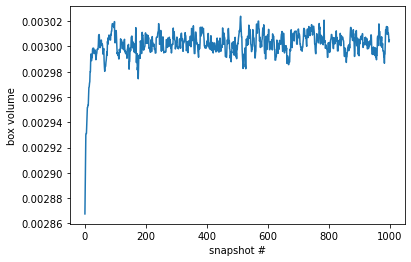

In [3]:
plt.plot(1/np.array(volumes_0))
plt.ylabel('box volume')
plt.xlabel('snapshot #')
plt.show()

In [4]:
np.mean(1/np.array(volumes_0[300:]))

0.003003176444112776

In [5]:
np.std(1/np.array(volumes_0[300:]))

6.920737491158719e-06

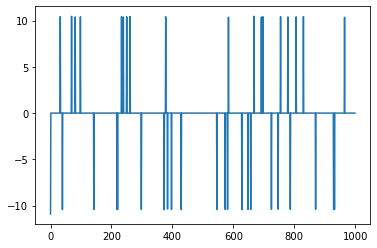

In [39]:
plt.plot((np.array(energies_0_with_correction) - np.array(energies_0_without_correction))*np.array(volumes_0))

In [40]:
np.mean((np.array(energies_0_with_correction) - np.array(energies_0_without_correction))*np.array(volumes_0))

-0.052626060286483346

In [41]:
np.std((np.array(energies_0_with_correction) - np.array(energies_0_without_correction))*np.array(volumes_0))

2.1097836398739878

## Get box volumes for lambda = 1 (without correction)

In [10]:
with open('bnbs_minimized_state_1.xml') as input:
    state = XmlSerializer.deserialize(input.read())

with open('bnbs_system.xml') as input:
    system = XmlSerializer.deserialize(input.read())

In [11]:
# Set up integrator and context
integrator = LangevinIntegrator(temperature=300 * unit.kelvin, 
                                                        collision_rate=1 / unit.picoseconds, 
                                                        timestep=4 * unit.femtoseconds)

platform = openmm.Platform.getPlatformByName('CUDA')
context = openmm.Context(system, integrator, platform)
# context.setPositions(positions)
# context.setPeriodicBoxVectors(*box_vectors)
# context.setPositions(positions)
# context.setVelocitiesToTemperature(300 * unit.kelvin)
context.setState(state)

In [12]:
for k, v in context.getParameters().items():
    if 'lambda' in k:
        context.setParameter(k, 1.0)
        
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_angles 1.0
lambda_bonds 1.0
lambda_electrostatics_core 1.0
lambda_electrostatics_delete 1.0
lambda_electrostatics_insert 1.0
lambda_sterics_core 1.0
lambda_sterics_delete 1.0
lambda_sterics_insert 1.0
lambda_torsions 1.0
softcore_alpha 0.85


In [13]:
system.getForce(8).setUseLongRangeCorrection(False)
system.getForce(7).setUseDispersionCorrection(False)

In [14]:
volumes_1 = []
energies_1_without_correction = []
energies_1_with_correction = []

for _ in tqdm_notebook(range(1000)):
    integrator.step(250) 
    
    # Get box volume and energy without correction
    state = context.getState(getEnergy=True)
    volumes_1.append(state.getPeriodicBoxVolume().value_in_unit_system(unit.md_unit_system))
    energies_1_without_correction.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    
    # Get energy with correction
    system.getForce(7).setUseDispersionCorrection(True)
    system.getForce(8).setUseLongRangeCorrection(True)
    state = context.getState(getEnergy=True)
    energies_1_with_correction.append(state.getPotentialEnergy().value_in_unit_system(unit.md_unit_system))
    
    # Turn correction off
    system.getForce(7).setUseDispersionCorrection(False)
    system.getForce(8).setUseLongRangeCorrection(False)

/scratch/lsftmp/4042681.tmpdir/ipykernel_22918/1607465935.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
with open("volumes_1.npy", "wb") as f:
    np.save(f, np.array(volumes_1))
    
with open("energies_1_without_correction.npy", "wb") as f:
    np.save(f, np.array(energies_1_without_correction))
    
with open("energies_1_with_correction.npy", "wb") as f:
    np.save(f, np.array(energies_1_with_correction))

In [16]:
with open("volumes_1.npy", "rb") as f:
    volumes_1 = np.load(f)
    

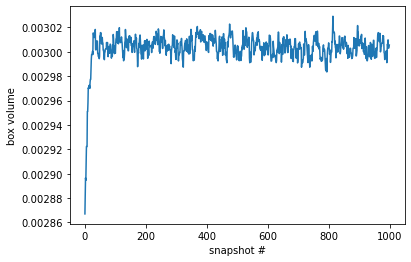

In [17]:
plt.plot(1/np.array(volumes_1))
plt.ylabel('box volume')
plt.xlabel('snapshot #')
plt.show()

In [18]:
np.mean(1/np.array(volumes_1[300:]))

0.003004076862678824

In [19]:
np.std(1/np.array(volumes_1[300:]))

7.172201668744358e-06

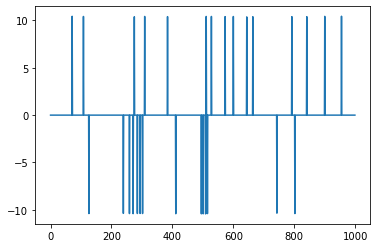

In [63]:
plt.plot((np.array(energies_1_with_correction) - np.array(energies_1_without_correction))*np.array(volumes_1))

In [64]:
np.mean((np.array(energies_1_with_correction) - np.array(energies_1_without_correction))*np.array(volumes_1))

0.01059640580255585

In [65]:
np.std((np.array(energies_1_with_correction) - np.array(energies_1_without_correction))*np.array(volumes_1))

1.7721596099536656